In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [52]:
df=pd.read_csv('/content/Financials.csv')

In [53]:
df.head()

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,"$1,618.50",$3.00,$20.00,"$32,370.00",$-,"$32,370.00","$16,185.00","$16,185.00",01/01/2014,1,January,2014
1,Government,Germany,Carretera,None,"$1,321.00",$3.00,$20.00,"$26,420.00",$-,"$26,420.00","$13,210.00","$13,210.00",01/01/2014,1,January,2014
2,Midmarket,France,Carretera,None,"$2,178.00",$3.00,$15.00,"$32,670.00",$-,"$32,670.00","$21,780.00","$10,890.00",01/06/2014,6,June,2014
3,Midmarket,Germany,Carretera,None,$888.00,$3.00,$15.00,"$13,320.00",$-,"$13,320.00","$8,880.00","$4,440.00",01/06/2014,6,June,2014
4,Midmarket,Mexico,Carretera,None,"$2,470.00",$3.00,$15.00,"$37,050.00",$-,"$37,050.00","$24,700.00","$12,350.00",01/06/2014,6,June,2014


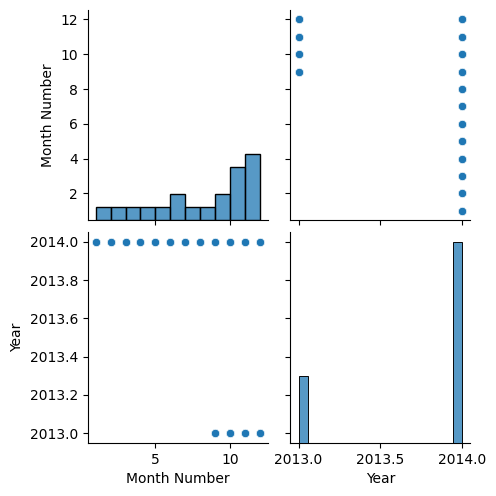

In [54]:
sns.pairplot(df)

In [55]:
df.describe()

,Month Number,Year
count,700.000000,700.000000
mean,7.900000,2013.750000
std,3.377321,0.433322
min,1.000000,2013.000000
25%,5.750000,2013.750000
50%,9.000000,2014.000000
75%,10.250000,2014.000000
max,12.000000,2014.000000


In [56]:
df.columns

Index(['Segment', 'Country', ' Product ', ' Discount Band ', ' Units Sold ',
       ' Manufacturing Price ', ' Sale Price ', ' Gross Sales ', ' Discounts ',
       '  Sales ', ' COGS ', ' Profit ', 'Date', 'Month Number',
       ' Month Name ', 'Year'],
      dtype='object')

In [57]:
df.columns=df.columns.str.strip()

In [58]:
df.columns

Index(['Segment', 'Country', 'Product', 'Discount Band', 'Units Sold',
       'Manufacturing Price', 'Sale Price', 'Gross Sales', 'Discounts',
       'Sales', 'COGS', 'Profit', 'Date', 'Month Number', 'Month Name',
       'Year'],
      dtype='object')

In [59]:
df.dtypes

,0
Segment,object
Country,object
Product,object
Discount Band,object
Units Sold,object
Manufacturing Price,object
Sale Price,object
Gross Sales,object
Discounts,object
Sales,object


In [60]:
numeric_cols = ['Units Sold', 'Manufacturing Price', 'Sale Price', 'Gross Sales', 'Discounts', 'Sales', 'COGS', 'Profit']

for i in numeric_cols:
  df[i]=df[i].replace('[\$-,]','',regex=True)

In [61]:
df[numeric_cols]= df[numeric_cols].apply(pd.to_numeric,errors='coerce')

In [62]:
df[numeric_cols]

,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit
0,1618.5,3.0,20.0,32370.0,NaN,32370.00,16185.0,16185.00
1,1321.0,3.0,20.0,26420.0,NaN,26420.00,13210.0,13210.00
2,2178.0,3.0,15.0,32670.0,NaN,32670.00,21780.0,10890.00
3,888.0,3.0,15.0,13320.0,NaN,13320.00,8880.0,4440.00
4,2470.0,3.0,15.0,37050.0,NaN,37050.00,24700.0,12350.00
...,...,...,...,...,...,...,...,...
695,2475.0,260.0,300.0,742500.0,111375.00,631125.00,618750.0,12375.00
696,546.0,260.0,300.0,163800.0,24570.00,139230.00,136500.0,2730.00
697,1368.0,5.0,7.0,9576.0,1436.40,8139.60,6840.0,1299.60
698,723.0,10.0,7.0,5061.0,759.15,4301.85,3615.0,686.85


In [63]:
df.dropna(inplace=True)

In [64]:
df.isnull().sum()

,0
Segment,0
Country,0
Product,0
Discount Band,0
Units Sold,0
Manufacturing Price,0
Sale Price,0
Gross Sales,0
Discounts,0
Sales,0


In [ ]:
df.head()

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
53,Government,France,Paseo,Low,3945.0,10.0,7.0,27615.0,276.15,27338.85,19725.0,7613.85,01/01/2014,1,January,2014
54,Midmarket,France,Paseo,Low,2296.0,10.0,15.0,34440.0,344.40,34095.60,22960.0,11135.60,01/02/2014,2,February,2014
55,Government,France,Paseo,Low,1030.0,10.0,7.0,7210.0,72.10,7137.90,5150.0,1987.90,01/05/2014,5,May,2014
56,Government,France,Velo,Low,639.0,120.0,7.0,4473.0,44.73,4428.27,3195.0,1233.27,01/11/2014,11,November,2014
57,Government,Canada,VTT,Low,1326.0,250.0,7.0,9282.0,92.82,9189.18,6630.0,2559.18,01/03/2014,3,March,2014


In [ ]:
summary=df.groupby('Segment').agg({'Sales':['mean','median','min','max'],'Profit':['mean','median','min','max']})

In [ ]:
summary

Sales                                        Profit  \
                           mean    median       min         max          mean   
Segment                                                                         
Channel Partners   17540.196000   17210.1   3341.52    42997.68  12781.346000   
Enterprise        193603.757079  190362.5  38362.50   514524.38   9877.493034   
Government        172741.188143   26945.6   1655.08  1159200.00  36681.964929   
Midmarket          24038.311379   24576.3   3139.20    53594.10   6474.173448   
Small Business    423526.234375  373755.0  62916.00  1038082.50  40086.130208   

                                               
                   median      min        max  
Segment                                        
Channel Partners  12672.6  2423.52   30919.68  
Enterprise         5690.0   880.00   40617.50  
Government        11681.3   285.60  262200.00  
Midmarket          6670.0   806.20   15584.10  
Small Business    34021.5  2152.00  136535.00

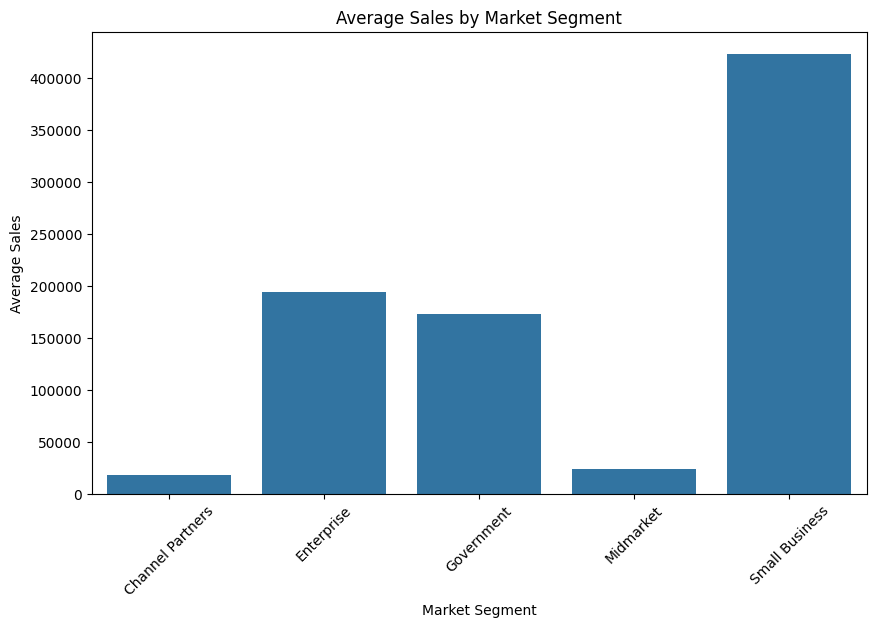

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x=summary.index,y=summary['Sales']['mean'])
plt.xlabel('Market Segment')
plt.ylabel('Average Sales')
plt.title('Average Sales by Market Segment')
plt.xticks(rotation=45)
plt.show()

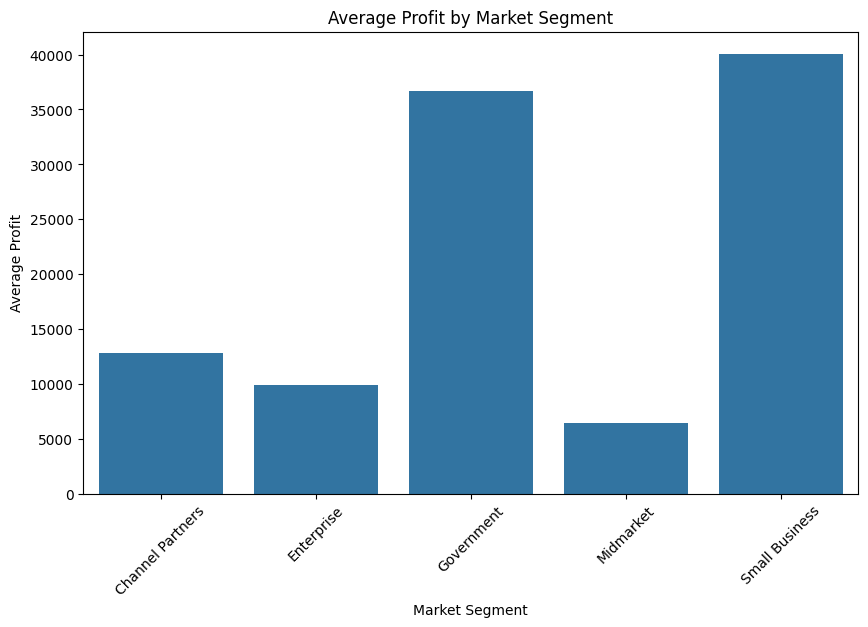

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x=summary.index,y=summary['Profit']['mean'])
plt.xlabel('Market Segment')
plt.ylabel('Average Profit')
plt.title('Average Profit by Market Segment')
plt.xticks(rotation=45)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


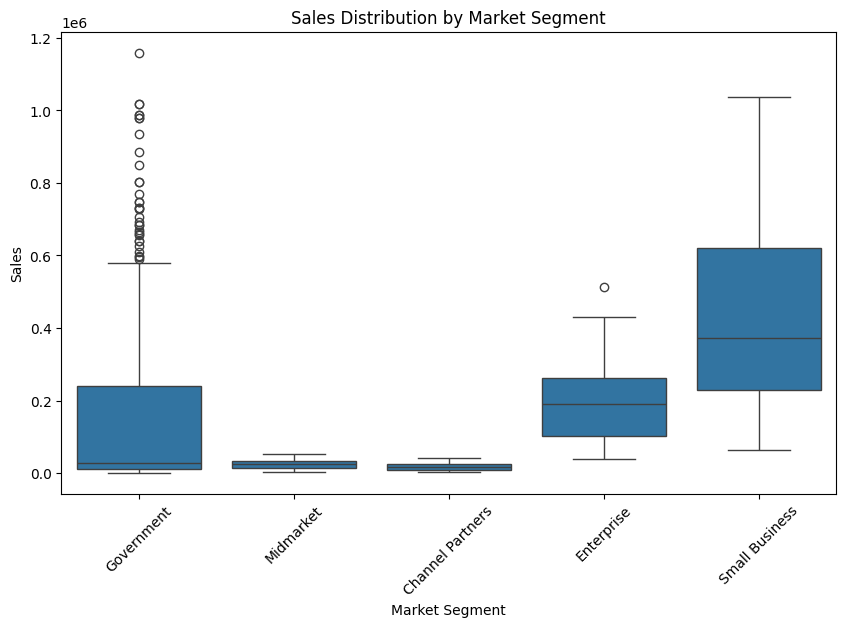

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Segment',y='Sales',data=df)
plt.xlabel('Market Segment')
plt.ylabel('Sales')
plt.title('Sales Distribution by Market Segment')
plt.xticks(rotation=45)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


Text(0.5, 1.0, 'Profit Distribution by Market Segment')

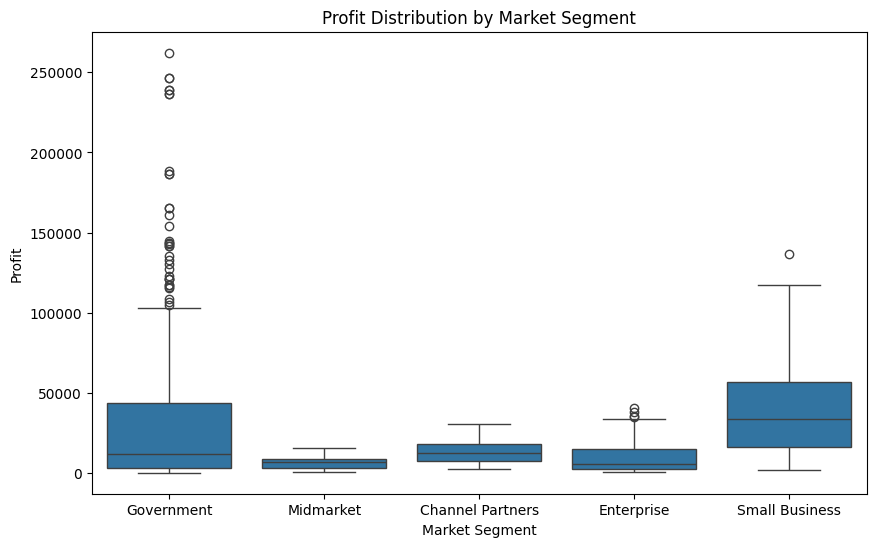

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Segment',y='Profit',data=df)
plt.xlabel('Market Segment')
plt.ylabel('Profit')
plt.title('Profit Distribution by Market Segment')

In [ ]:
mostprofit=summary.sort_values(by=('Profit','mean'))
mostprofit

Sales                                        Profit  \
                           mean    median       min         max          mean   
Segment                                                                         
Midmarket          24038.311379   24576.3   3139.20    53594.10   6474.173448   
Enterprise        193603.757079  190362.5  38362.50   514524.38   9877.493034   
Channel Partners   17540.196000   17210.1   3341.52    42997.68  12781.346000   
Government        172741.188143   26945.6   1655.08  1159200.00  36681.964929   
Small Business    423526.234375  373755.0  62916.00  1038082.50  40086.130208   

                                               
                   median      min        max  
Segment                                        
Midmarket          6670.0   806.20   15584.10  
Enterprise         5690.0   880.00   40617.50  
Channel Partners  12672.6  2423.52   30919.68  
Government        11681.3   285.60  262200.00  
Small Business    34021.5  2152.00  136535.00

In [ ]:
highestsales=summary.sort_values(by=('Sales','mean'))
highestsales

Sales                                        Profit  \
                           mean    median       min         max          mean   
Segment                                                                         
Channel Partners   17540.196000   17210.1   3341.52    42997.68  12781.346000   
Midmarket          24038.311379   24576.3   3139.20    53594.10   6474.173448   
Government        172741.188143   26945.6   1655.08  1159200.00  36681.964929   
Enterprise        193603.757079  190362.5  38362.50   514524.38   9877.493034   
Small Business    423526.234375  373755.0  62916.00  1038082.50  40086.130208   

                                               
                   median      min        max  
Segment                                        
Channel Partners  12672.6  2423.52   30919.68  
Midmarket          6670.0   806.20   15584.10  
Government        11681.3   285.60  262200.00  
Enterprise         5690.0   880.00   40617.50  
Small Business    34021.5  2152.00  136535.00

In [ ]:
df['Date']=pd.to_datetime(df['Date'])

In [ ]:
df['Date']

,Date
53,2014-01-01
54,2014-01-02
55,2014-01-05
56,2014-01-11
57,2014-01-03
...,...
695,2014-01-03
696,2014-01-10
697,2014-01-02
698,2014-01-04


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

Text(0.5, 1.0, 'Sales Over Time')

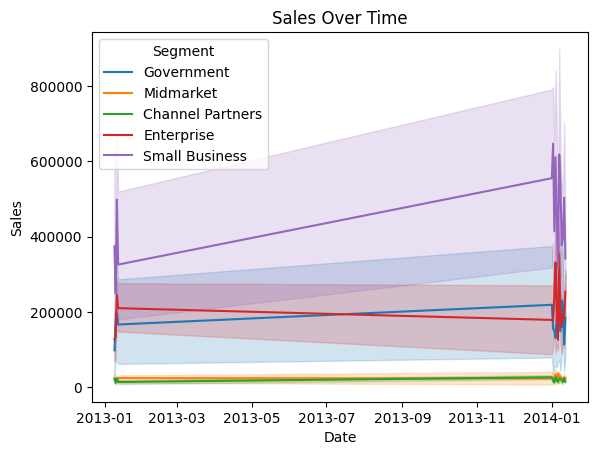

In [ ]:
sns.lineplot(x='Date',y='Sales',hue='Segment',data=df)
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Over Time')

In [68]:
from scipy.stats import ttest_ind
sales_segment1=df[df['Segment']=='Government']['Sales']
sales_segment2=df[df['Segment']=='Midmarket']['Sales']

In [69]:
profit_segment1=df[df['Segment']=='Government']['Profit']
profit_segment2=df[df['Segment']=='Midmarket']['Profit']

In [70]:
t_stat_sales, p_value_sales = ttest_ind(sales_segment1, sales_segment2, equal_var=False)

print("T-Statistic:", t_stat_sales)
print("P-Value:", p_value_sales)

T-Statistic: 9.318883158829065
P-Value: 3.467580372578953e-18


In [71]:
t_stat_profit, p_value_profit = ttest_ind(profit_segment1, profit_segment2, equal_var=False)
print("T-Statistic:", t_stat_profit)
print("P-Value:", p_value_profit)

T-Statistic: 9.16801216795123
P-Value: 9.728365675108965e-18


In [72]:
average_profit_segment=df.groupby('Segment')['Profit'].mean()
average_profit_segment

,Profit
Segment,
Channel Partners,12781.346000
Enterprise,9877.493034
Government,36681.964929
Midmarket,6474.173448
Small Business,40086.130208


In [73]:
total_Sales_segment=df.groupby('Segment')['Sales'].sum()
total_Sales_segment

,Sales
Segment,
Channel Partners,1578617.64
Enterprise,17230734.38
Government,48367532.68
Midmarket,2091333.09
Small Business,40658518.50


In [75]:
most_profitable_segment = average_profit_segment.idxmax()


highest_sales_segment =total_Sales_segment.idxmax()


print("Insights:")
print("- The most profitable market segment is:", most_profitable_segment)
print("- The market segment with the highest total sales is:", highest_sales_segment)

Insights:
- The most profitable market segment is: Small Business
- The market segment with the highest total sales is: Government


In [76]:
print("\nRecommendations:")
if most_profitable_segment == highest_sales_segment:
    print("- Focus on the", most_profitable_segment, "market segment as it is both highly profitable and has the highest sales.")
else:
    print("- Consider allocating more resources to the", most_profitable_segment, "market segment, as it is the most profitable.")
    print("- Additionally, identify opportunities to boost sales in the", highest_sales_segment, "market segment to further grow revenue.")


Recommendations:
- Consider allocating more resources to the Small Business market segment, as it is the most profitable.
- Additionally, identify opportunities to boost sales in the Government market segment to further grow revenue.
